In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_with_controls = {
    "rmse": [0.17289812458927367, 0.15949570871822882, 0.14293865208993858, 0.09426448738948502],
    "cutoff": ["2019-05-19", "2020-11-29", "2021-11-28", "2022-09-25"],
    "ids": [628, 636, 650, 661],
}

df_no_controls = {
    "rmse": [0.17289812458927367, 0.17478394736410938, 0.14214846209801338, 0.09181576400412683],
    "cutoff": ["2019-05-19", "2020-11-29", "2021-11-28", "2022-09-25"],
}

df_fixed_length = {
    "rmse": [0.16227648998468916, 0.18166475379946984, 0.17878770631628244, 0.15685686156165762],
    "cutoff": ["2019-05-19", "2020-11-29", "2021-11-28", "2022-09-25"],
}


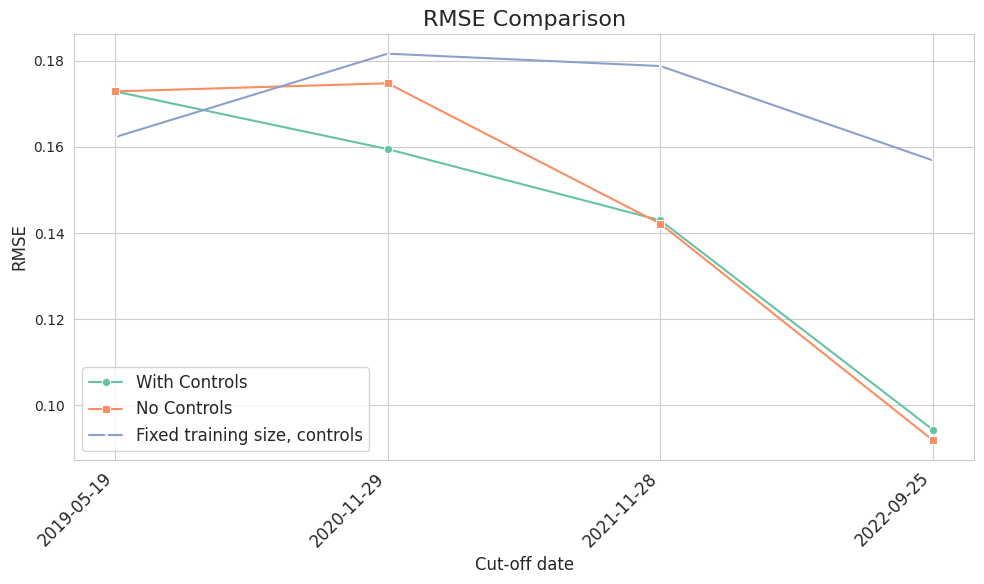

In [3]:
# Set a custom color palette
sns.set_palette("Set2")

# Increase font size
plt.rcParams["font.size"] = 12

# Set grid style
sns.set_style("whitegrid")

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot df_with_controls
sns.lineplot(data=df_with_controls, x="cutoff", y="rmse", label="With Controls", marker="o")

# Plot df_no_controls
sns.lineplot(data=df_no_controls, x="cutoff", y="rmse", label="No Controls", marker="s")

# Plot df_fixed_length
sns.lineplot(
    data=df_fixed_length, x="cutoff", y="rmse", label="Fixed training size, controls", marker="x"
)

# Set plot title and labels
plt.title("RMSE Comparison", fontsize=16)
plt.xlabel("Cut-off date", fontsize=12)
plt.ylabel("RMSE", fontsize=12)

# Customize the tick labels
plt.xticks(rotation=45, ha="right")
plt.yticks(fontsize=10)

# Add legend
plt.legend(fontsize=12)

# Save the plot
plt.savefig("vote_forecasting_rmse_comparison.pdf", dpi=300, bbox_inches="tight")

# Show the plot
plt.tight_layout()
plt.show()

In [4]:
combined_df = pd.concat([df_no_controls, df_with_controls], ignore_index=True, axis=1)
combined_df.drop(columns=[1, 4], inplace=True)
combined_df

TypeError: cannot concatenate object of type '<class 'dict'>'; only Series and DataFrame objs are valid

In [ ]:
combined_df.columns = pd.MultiIndex.from_tuples([("No Socio-Economic Controls", "RMSE"), ("With Socio-Economic Controls", "RMSE"), ("Cut-off Date", "")])
combined_df

,No Socio-Economic Controls,With Socio-Economic Controls,Cut-off Date
,RMSE,RMSE,
0,0.172898,0.172898,2019-05-19
1,0.174784,0.159496,2020-11-29
2,0.142148,0.142939,2021-11-28
3,0.091816,0.094264,2022-09-25


In [ ]:
print(combined_df.to_latex(index=False, float_format="%.3f"))

\begin{tabular}{rrl}
\toprule
No Socio-Economic Controls & With Socio-Economic Controls & Cut-off Date \\
RMSE & RMSE &  \\
\midrule
0.173 & 0.173 & 2019-05-19 \\
0.175 & 0.159 & 2020-11-29 \\
0.142 & 0.143 & 2021-11-28 \\
0.092 & 0.094 & 2022-09-25 \\
\bottomrule
\end{tabular}

